<a href="https://colab.research.google.com/github/hussain0048/Machine-Learning-Driven-Approach-for-2019-nCoV-Warning-System/blob/master/Implementation/AR_and_ARIMA_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1- Autoregressive (AR) and Auto Regressive Integrated Moving Average (ARIMA) Models**

**Introduction:**

A statistical model is autoregressive if it predicts future values based on past values. For example, an autoregressive model might seek to predict a stock's future prices based on its past performance [1].An AR(1) autoregressive process is one in which the current value is based on the immediately preceding value, while an AR(2) process is one in which the current value is based on the previous two values. An AR(0) process is used for white noise and has no dependence between the terms [1]

In [ ]:
!git clone https://github.com/hussain0048/Machine-Learning-Driven-Approach-for-2019-nCoV-Warning-System.git

In [ ]:
# this code is used to upload dataset from Pc to colab
from google.colab import files # Please First run this cod in chrom 
def getLocalFiles():
    _files = files.upload() # upload StudentNextSessionf.csv datase
    if len(_files) >0: # Then run above  libray 
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving data_cases1.csv to data_cases1.csv


In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1 - Importing necessary libraries** ##
we import the following python packges for this tutorial 
 - pandas: importing index data
 - matplotlib: it is used for ploting data
 - statsmodels build time series models
 - statistic to help find statistic of models

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [49]:
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
from statsmodels.tsa.arima_model import ARIMA 
import statistics

In [50]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [51]:
from pandas import Series
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_squared_error

## **2 - Load Datasets** ##

In [52]:
daily_confirm = pd.read_csv("/content/drive/My Drive/Datasets/Covid-19/data_cases1.csv", usecols=['Date','Confirmed'],index_col='Date', parse_dates=True )
daily_confirm.head()

,Confirmed
Date,
2020-03-10,267.0
2020-03-10,173.0
2020-03-10,144.0
2020-03-10,92.0
2020-03-10,17.0


## **3- Data Description** # 

In [ ]:
daily_confirm.index

In [ ]:
daily_confirm.head()

In [ ]:
daily_confirm['2020-10-03':'2020-15-03']

## **3- Check and Fill the missing value** 

finding all columns that have nan

In [56]:
daily_confirm.isna().sum()

Confirmed    11
dtype: int64

In [57]:
for j in range(0,1):       
        daily_confirm.iloc[:,j]=daily_confirm.iloc[:,j].fillna(daily_confirm.iloc[:,j].mean())  

## **4 - Ploting** ##


In [ ]:
 daily_confirm.plot(daily_confirm['Confirmed'])

In [ ]:
%matplotlib inline
daily_confirm.Confirmed.resample("M").mean().plot()

In [ ]:
daily_confirm.Confirmed.resample("W").mean().plot()

In [ ]:
daily_confirm.Confirmed.resample("D").mean().plot()

In [ ]:
Quarterly_resampled_data = daily_confirm.Confirmed.resample('Q').mean().plot()

In [ ]:
daily_confirm.Confirmed.resample('QS').mean().plot()

In [ ]:
daily_confirm.Confirmed.resample('M').mean().plot(kind="line")

##**5- Correlation** ##
Visual check of correlation by plotting the scatter plot against the previous and next time step Pandas built in plot - Lagplot - to do visual check



##**6-Stationary**

To check wither data is stationaly or not. stationary mean that is data is constant in mean and variance . we cehck this becasue many time sieries model required that data should be stationary in order to model it. It should be concentatn movment up and down momement

In [ ]:
plt.plot(daily_confirm)
plt.show()

now we make data stationary if data is not stationary 
  - Difference the data and make it satationary . difference mean substract the next value 
  - fill the miss value data

In [64]:
# take serveral diff untill your data become stationary 
daily_confirm_diff1=daily_confirm.diff().fillna(daily_confirm)

In [65]:
daily_confirm_diff2=daily_confirm_diff1.diff().fillna(daily_confirm_diff1)

In [66]:
daily_confirm_diff3=daily_confirm_diff2.diff().fillna(daily_confirm_diff2)

In [67]:
daily_confirm_diff4=daily_confirm_diff3.diff().fillna(daily_confirm_diff3)

In [68]:
daily_confirm_diff5=daily_confirm_diff4.diff().fillna(daily_confirm_diff4)

In [ ]:
plt.plot(daily_confirm_diff5)
plt.show()

## 7-**Autocorrelation Function (ACF) plot**

**Partial Autocorrelation Function(PACF) Plot ** 

Helps determine number of autoregressive AR term and moving average term

can also be used to help see seasonality or periodic trends


In [ ]:
plot_acf(daily_confirm_diff5)
plt.show()

In [ ]:
plot_pacf(daily_confirm_diff5)
plt.show()

## **7-Data Spliting** ##

In [72]:
 X = daily_confirm_diff5.values
train, test = X[1:len(X)-7], X[len(X)-7:]

##**8 -Autoregressive model**##
Forecast the next timestamp value by regressing over previous vaues

### **8.1 - Models training on training Data** ###


In [73]:
from statsmodels.tsa.ar_model import AR

In [74]:
model = AR(train)
model_fit = model.fit()

In [ ]:
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

### **8.2 - Model prediction on test data**### 

In [76]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [ ]:
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

### **8.3- Model Evaulation**###

In [78]:
error = mean_squared_error(test, predictions)

In [ ]:
print('Test MSE: %.3f' % error)

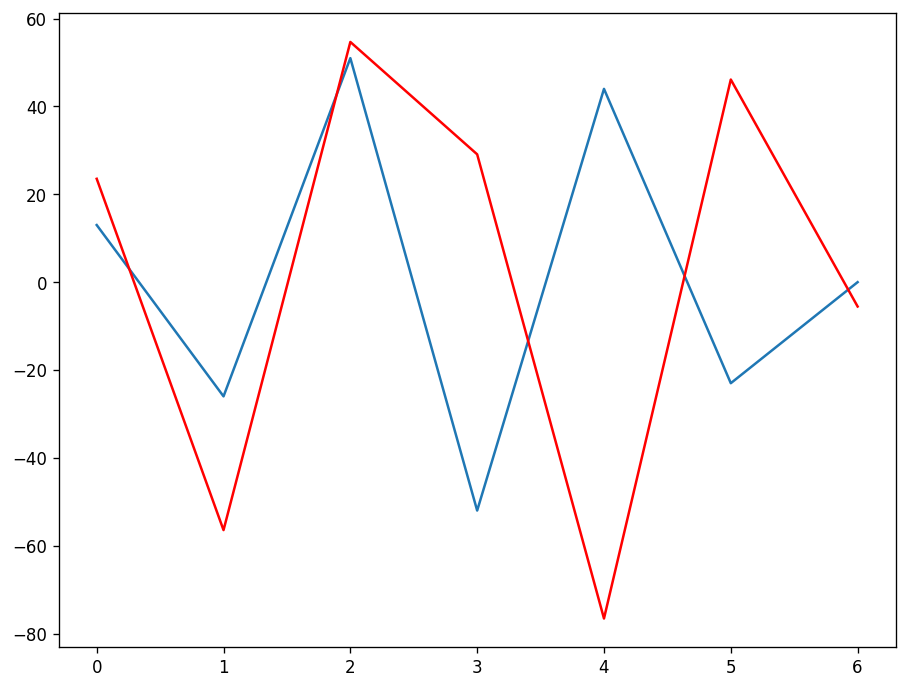

In [80]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

### **8.4 -Model tunning**

In [81]:
window = model_fit.k_ar
coef = model_fit.params

In [82]:
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()

In [83]:
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=23.529196, expected=13.000000
predicted=-9.773814, expected=-26.000000
predicted=43.635559, expected=51.000000
predicted=-57.484915, expected=-52.000000
predicted=37.988487, expected=44.000000
predicted=-33.853246, expected=-23.000000
predicted=-12.596304, expected=0.000000


### **8.5 - Model Evaulation** ###

In [84]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 110.153


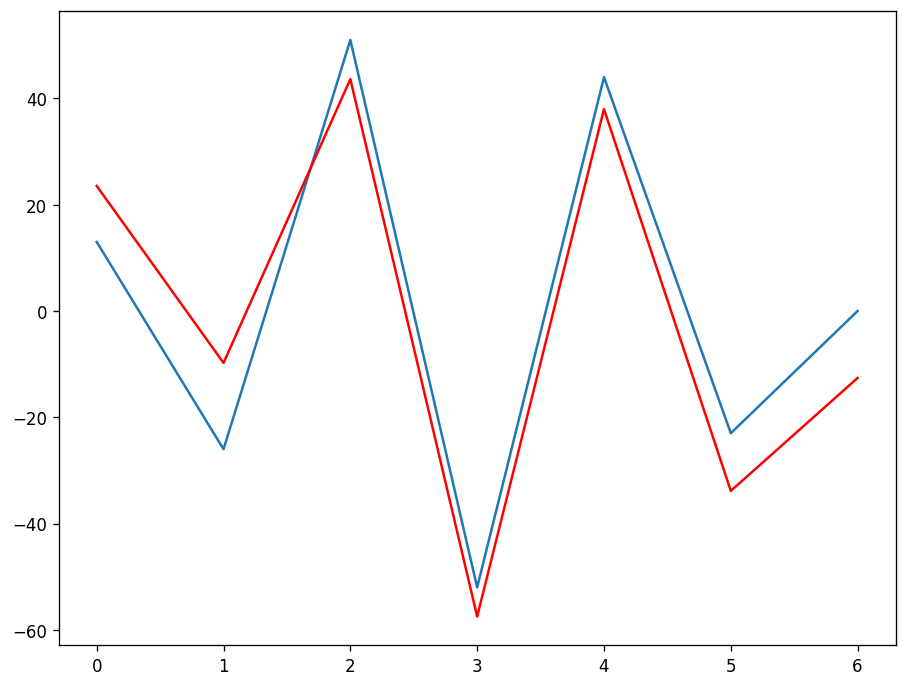

In [85]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## **9 - Auto Regressive Integrated Moving Average (ARIMA)**

 Forecast the next timestamps value by averaging over the previous values 
  - useful for non-stationary data
  - allows us to difference the data
  - also includes a seasona differencing parameter for seasonal non-stationary data 

### **9.1 Models training on training Data**

In [130]:
#5,2,0
model_ARIMA = ARIMA(train,order=(1,1,0))
model_fit_ARIMA = model_ARIMA.fit(disp=0)

In [ ]:
print('Lag: %s' % model_fit_ARIMA.k_ar)
print('Coefficients: %s' % model_fit_ARIMA.params)

### **9.2 - Model prediction on test data.** ###


In [132]:
predictions_ARIMA = model_fit_ARIMA.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [ ]:
for i in range(len(predictions_ARIMA)):
    print('predicted=%f, expected=%f' % (predictions_ARIMA[i], test[i]))

In [ ]:
# Another Mothod 
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(train, order=(0,1))
res = mod.fit()
res.plot_predict(start=1990, end=1991)
plt.show()
predictions_ARIMA = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions_ARIMA)):
    print('predicted=%f, expected=%f' % (predictions_ARIMA[i], test[i]))


###7.3 Model Evaulation##

In [135]:
error_ARIMA = mean_squared_error(test, predictions_ARIMA)

In [136]:
print('Test MSE: %.3f' % error_ARIMA)

Test MSE: 1206.961


In [ ]:
plt.plot(test)
plt.plot(predictions_ARIMA, color='red')
plt.show()

###7.4 Model tunning##

In [137]:
window_ARIMA = model_fit_ARIMA.k_ar
coef_ARIMA = model_fit_ARIMA.params

In [138]:
history_ARIMA = train[len(train)-window_ARIMA:]
history_ARIMA = [history_ARIMA[i] for i in range(len(history_ARIMA))]
predictions_ARIMA = list()

In [ ]:
for t in range(len(test)):
    length = len(history_ARIMA)
    lag = [history_ARIMA[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window_ARIMA):
        yhat += coef[d+1] * lag[window_ARIMA-d-1]
    obs = test[t]
    predictions_ARIMA.append(yhat)
    history_ARIMA.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

###7.5 Model Evaulation##

References:

Autoregressive¶
https://www.investopedia.com/terms/a/autoregressive.asp

Autoregressive Models
https://online.stat.psu.edu/stat501/lesson/14/14.1#:~:text=An%20autoregressive%20model%20is%20when,from%20that%20same%20time%20series.&text=The%20order%20of%20an%20autoregression,value%20at%20the%20present%20time.

ARIMA modeling and forecasting: Time Series in Python Part 2
https://tutorials.datasciencedojo.com/arima-model-time-series-python/